In [2]:
#im skipping leap days currently in multiple places
import sys
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib import rc
import datetime
import pandas as pd
import seaborn
import random
import json
import pickle
import time
import copy

import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
x = np.arange(0,500,1)
y = np.power(1.0/(1.0+x),0.7)

x1 = 5
x2 = 25
xmax = 15
p1 = []
p2 = []
for i in x:
    p1.append(np.power(1.0/(1.0+x1),0.7))
    p2.append(np.power(1.0/(1.0+x2),0.7))

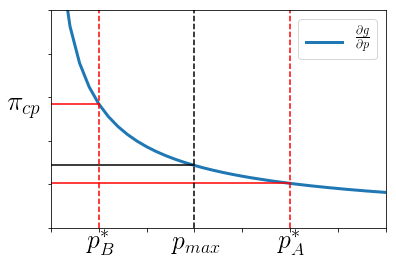

In [6]:
axes = plt.gca()

plt.rc('text', usetex=True)

plt.plot(x,y, lw=3, label=r"$\frac{\partial g}{\partial p}$")
#plt.plot([5,5],[0,np.power(1.0/(1.0+5),0.7)], color="red")
plt.plot([0,x1],[np.power(1.0/(1.0+x1),0.7),np.power(1.0/(1.0+x1),0.7)], color="red")
plt.plot([0,x2],[np.power(1.0/(1.0+x2),0.7),np.power(1.0/(1.0+x2),0.7)], color="red")
plt.plot([0,xmax],[np.power(1.0/(1.0+xmax),0.7),np.power(1.0/(1.0+xmax),0.7)], color="black")
#plt.plot(x, p1, color="red")
#plt.plot(x, p2, color="red")
plt.axvline(x = 25, ls="--", color="red")
plt.axvline(x = 5, ls="--", color="red")
plt.axvline(x = 15, ls="--", color="black")
plt.xlim(0,35)
plt.ylim(0,0.5)
#plt.plot([(0,0),(1,1)])
#ylab = plt.ylabel(r"$\frac{\partial G}{\partial p}$", fontsize=28, labelpad=20)
ylab = plt.ylabel(r"$\pi_{cp}$", fontsize=28, labelpad=20)
ylab.set_rotation(0)

a=axes.get_xticks().tolist()
for label in range(len(a)):
    a[label] = ''
a[1]='$p^{*}_{B}$'
a[3]='$p_{max}$'
a[5]='$p^{*}_{A}$'
axes.set_xticklabels(a, fontsize=26)

b = axes.get_yticks().tolist()
for label in range(len(b)):
    b[label] = ''
axes.set_yticklabels(b)
    
plt.legend(fontsize=18)

plt.show()

In [17]:
#weighting function



def curtail(cdf_value, alpha):
    out = np.max([0, (cdf_value - alpha)/(1 - alpha)])
    return(out)

x = np.arange(0.5,1,0.001)
ys = []
alphas = [0.7, 0.85, 0.95]

for a in alphas:
    y = []
    for val in x:
        y.append(curtail(val, a))
    ys.append(y)

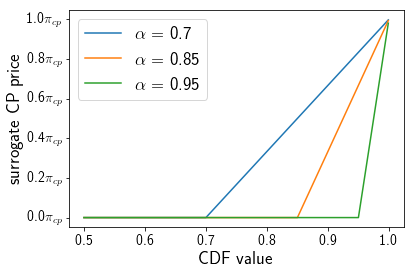

In [31]:
axes = plt.gca()

plt.rc('text', usetex=True)

for i in range(len(alphas)):
    plt.plot(x, ys[i], label=r"$\alpha=$ " + str(alphas[i]))
    
plt.ylabel("surrogate CP price", fontsize=18)
plt.xlabel("CDF value", fontsize=18)

a=axes.get_yticks().tolist()
for label in range(len(a)):
    a[label] = str(np.around(a[label], decimals=2)) + r"$\pi_{cp}$"
axes.set_yticklabels(a, fontsize=14)

a=axes.get_xticks().tolist()
a = [np.around(i, decimals=2) for i in a]
axes.set_xticklabels(a, fontsize=14)

    
plt.legend(fontsize=18)
plt.show()

In [4]:
#stepped function

x = np.arange(0.5,1,0.001)
ys = []
alphas = [0.7, 0.85, 0.95]

for a in alphas:
    y = []
    for val in x:
        if val > a:
            y.append(1)
        else:
            y.append(0)
    ys.append(y)

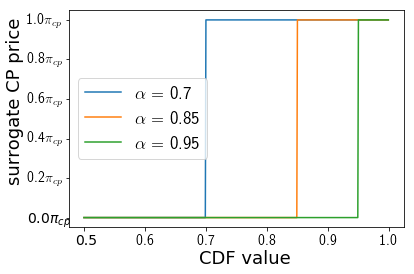

In [5]:
axes = plt.gca()

plt.rc('text', usetex=True)

for i in range(len(alphas)):
    plt.plot(x, ys[i], label=r"$\alpha=$ " + str(alphas[i]))
    
plt.ylabel("surrogate CP price", fontsize=18)
plt.xlabel("CDF value", fontsize=18)

a=axes.get_yticks().tolist()
for label in range(len(a)):
    a[label] = str(np.around(a[label], decimals=2)) + r"$\pi_{cp}$"
axes.set_yticklabels(a, fontsize=14)

a=axes.get_xticks().tolist()
a = [np.around(i, decimals=2) for i in a]
axes.set_xticklabels(a, fontsize=14)

    
plt.legend(fontsize=18)
plt.show()